In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


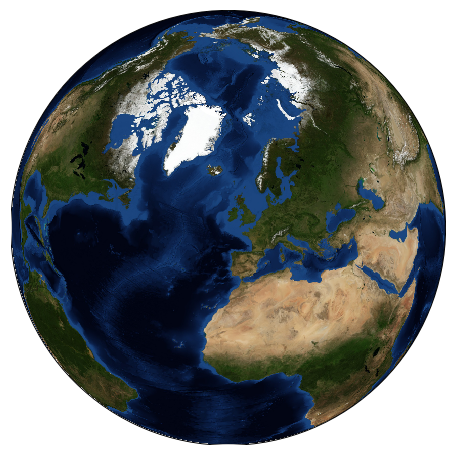

In [6]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-10)
m.bluemarble(scale=0.5);

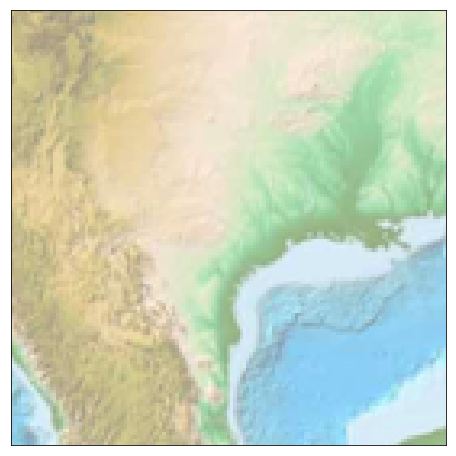

In [21]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='f',
            width=2E6, height=2E6, 
            lat_0=30.2672, lon_0=-97.7431,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
# x, y = m(-97.7431, 30.2672)
# plt.plot(x, y, 'ok', markersize=5)
# plt.text(x, y, ' Austin', fontsize=12);

In [ ]:
from mpl_toolkits.basemap import Basemap
from matplotlib.collections import LineCollection
import matplotlib as mpl
from matplotlib.colors import rgb2hex
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os


# Read in population data.
pop_path = "ChicagoPopulation.csv"
DF       = read_csv("Sheet1")
colormap = plt.cm.Purples 

us_shape_file_dir = "cb_2017_us_zcta510_500k"
os.chdir(us_shape_file_dir)

# Chicago coordinates.
lowerlon = -88.2 
upperlon = -87.2
lowerlat = 41.62
upperlat = 42.05


m = Basemap(
    llcrnrlon=lowerlon,
    llcrnrlat=lowerlat,
    urcrnrlon=upperlon,
    urcrnrlat=upperlat,
    projection="lcc",
    resolution="c",
    lat_0=lowerlat,
    lat_1=upperlat,
    lon_0=lowerlon,
    lon_1=upperlon
    )


shp_info = m.readshapefile(
    os.path.basename(us_shape_file_dir),'states',drawbounds=True
    )

# Convert integer ZIP5 field to character dtype.
DF['ZIP5'] = DF['ZIP5'].astype(str)

# Read population density info into popdens dict. Take square root of 
# actual density for better color mapping.
popdens = {
    str(i):np.sqrt(j) for (i, j) in zip(DF.ZIP5.values,DF.POPULATION.values)
    }

# Choose a color for each state based on population density. Range
# vmin-vmax has arbitrarily been set to 0-6. Fee lfree to experiment 
# with other ranges.
ziplist = []
colors  = {}
vmin    = 0.
vmax    = 6.


# Filter m.states_info to only Chicago zipcodes.
zip_info   = m.states_info
popdiv     = (max(popdens.values())/(vmax-vmin))
popdensscl = {i:(j/popdiv) for (i,j) in popdens.items()}


for d in zip_info:
    iterzip = d["ZCTA5CE10"]
    if iterzip in popdensscl.keys():
        iterpop = popdensscl.get(iterzip,0)
        colors[iterzip] = colormap(iterpop/vmax)[:3]
    ziplist.append(iterzip)


for nshape,seg in enumerate(m.states):
    i, j = zip(*seg)
    if ziplist[nshape] in popdensscl.keys():
        color = rgb2hex(colors[ziplist[nshape]])
        edgecolor = "#000000"
         plt.fill(i,j,color,edgecolor=edgecolor);


# (Optional) include colorbar.
sm = plt.cm.ScalarMappable(
    cmap=colormap,norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    )

mm = plt.cm.ScalarMappable(cmap=colormap)
mm.set_array([vmin, vmax])
plt.colorbar(mm,ticks=np.arange(vmin, vmax+1, 1),orientation="vertical")
plt.title("Chicago Population by ZIP5")
plt.gca().axis("off")
plt.show()